In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("amazon.csv")
df.size

23440

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [23]:
df.rating.unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

In [24]:
# convert object data type of discount_percentage and rating column into numerical column


df['discount_percentage'] = df['discount_percentage'].astype(str)
df['discount_percentage'] = df['discount_percentage'].str.replace("%","").astype(int)
# Convert 'rating' column to string
df['rating'] = df['rating'].astype(str)

# Replace '|' character
df['rating'] = df['rating'].str.replace('|', '')

# Replace empty strings with NaN
df['rating'] = df['rating'].replace('', np.nan)

# Drop rows with NaN values in 'rating' column
df = df.dropna(subset=['rating'])

# Convert 'rating' column to float
df['rating'] = df['rating'].astype(float)


# only extract the first name  categories
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])


# convert rating count in to float
df["rating_count"] = df["rating_count"].astype(str)
df["rating_count"] = df["rating_count"].str.replace(",","").replace("nan",0).astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   object 
 4   actual_price         1464 non-null   object 
 5   discount_percentage  1464 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1464 non-null   int64  
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

In [26]:
#1. What is the average rating for each product category?

df.groupby("main_category")["rating"].mean()

main_category
Car&Motorbike            3.800000
Computers&Accessories    4.154967
Electronics              4.081749
Health&PersonalCare      4.000000
Home&Kitchen             4.040716
HomeImprovement          4.250000
MusicalInstruments       3.900000
OfficeProducts           4.309677
Toys&Games               4.300000
Name: rating, dtype: float64

In [40]:
#2.What are the top rating_count products by category ?


top_products_by_category = df.groupby('main_category').apply(lambda x: x.nlargest(10, "rating_count")).reset_index(drop = True)
top_products_by_category

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category
0,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,"₹2,339","₹4,000",42,3.8,1118,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...,Car&Motorbike
1,B005FYNT3G,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories|ExternalDevices&DataStor...,₹289,₹650,56,4.3,253105,"Ultra-compact and portable USB flash drive,Cap...","AFNMA3FQAONYMREOFLNYF2RV4AOA,AHAYDWCGM4QNXWBCR...","RAJIV D.,Antony Gruz,ajay,Praveen kumar,Sujoy ...","R2XCI5KR2H8QEI,R3BNQCB05PYZMV,RVXXO15AGASNX,R1...","Good product,Affordable,Good,Reding speed is o...","Very chip very good,Really happy to buy this p...",https://m.media-amazon.com/images/I/310mw9KTJv...,https://www.amazon.in/SanDisk-Cruzer-Blade-Fla...,Computers&Accessories
2,B01N6LU1VF,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,Computers&Accessories|ExternalDevices&DataStor...,₹579,"₹1,400",59,4.3,189104,Compatible with Micro USB Type 'B' Android bas...,"AF7IXQKBUL6NEIQG4R53LMJJUGXQ,AFVFGVFOC6WUUL7VZ...","Neeraj Vishwakarma,UD,M.Sathish kumar,Karthik,...","R3D9U8JX5A9TUJ,R35QH8XSF5Q7Q8,R2GIERTOOHJ61Y,R...",It takes Forever - to transfer anything. Maybe...,Update:I returned the drive with money reverte...,https://m.media-amazon.com/images/I/41sAt4BZyd...,https://www.amazon.in/SanDisk-Ultra-Dual-64GB-...,Computers&Accessories
3,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,Computers&Accessories
4,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,₹499,₹999,50,4.2,179691,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,Computers&Accessories
5,B0088TKTY2,TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...,Computers&Accessories|NetworkingDevices|Networ...,₹649,"₹1,399",54,4.2,179691,300 Mbps Wi-Fi —— 300Mbps wireless speed ideal...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/41jxZkzNcn...,https://www.amazon.in/TP-Link-TL-WN823N-300Mbp...,Computers&Accessories
6,B07DC4RZPY,Amazon Basics USB A to Lightning MFi Certified...,Computers&Accessories|Accessories&Peripherals|...,₹709,"₹1,999",65,4.1,178817,MFi-certified charging cable for securely char...,"AHDZE7UM6PQPAOJPJJ57QUHGGTAA,AGMGMQ6LB27Y52XFB...","Pete25,Bhanu,Naveen Kr Singh,kavan,BG,Aditya B...","R35VPRJY5B5Z2G,R2YMIH3T7VWAY1,R3UEQM867K8BUH,R...","Data transfer not the best,Good cable 

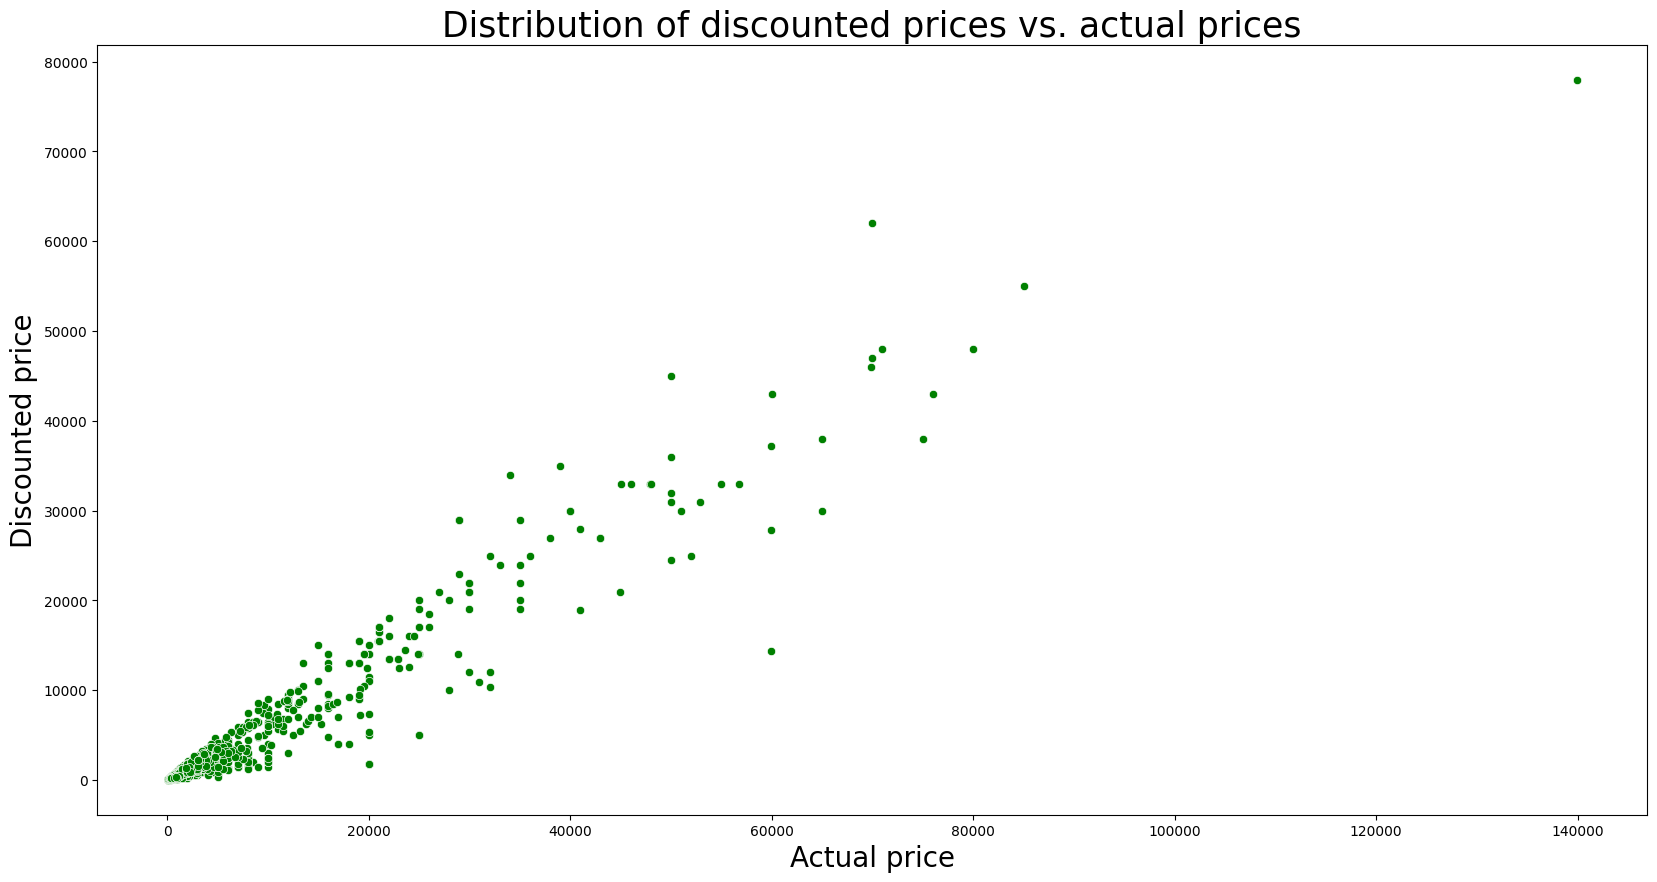

In [20]:
#3. What is the distribution of discounted prices vs. actual prices
plt.figure(figsize=(20,10))

# convert object type discounted price value in to integer type
df['discounted_price'] = df["discounted_price"].astype(str)
df['discounted_price'] = df['discounted_price'].str.replace(",", "").str.replace('₹', "").astype(float)
df['discounted_price'].dtypes


# convert object type actual price in to integer type
df['actual_price'] = df["actual_price"].astype(str)
df['actual_price'] = df['actual_price'].str.replace(",", "").str.replace('₹', "").astype(float)
df['actual_price'].dtypes



sns.scatterplot(y = 'discounted_price', x = 'actual_price', data = df, color = 'g')
plt.xlabel("Actual price", fontsize = 20)
plt.ylabel("Discounted price",fontsize = 20 )
plt.title("Distribution of discounted prices vs. actual prices", fontsize = 25)
plt.show()


# Insight >> As the actual prices increases the discount price is also increases

In [21]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

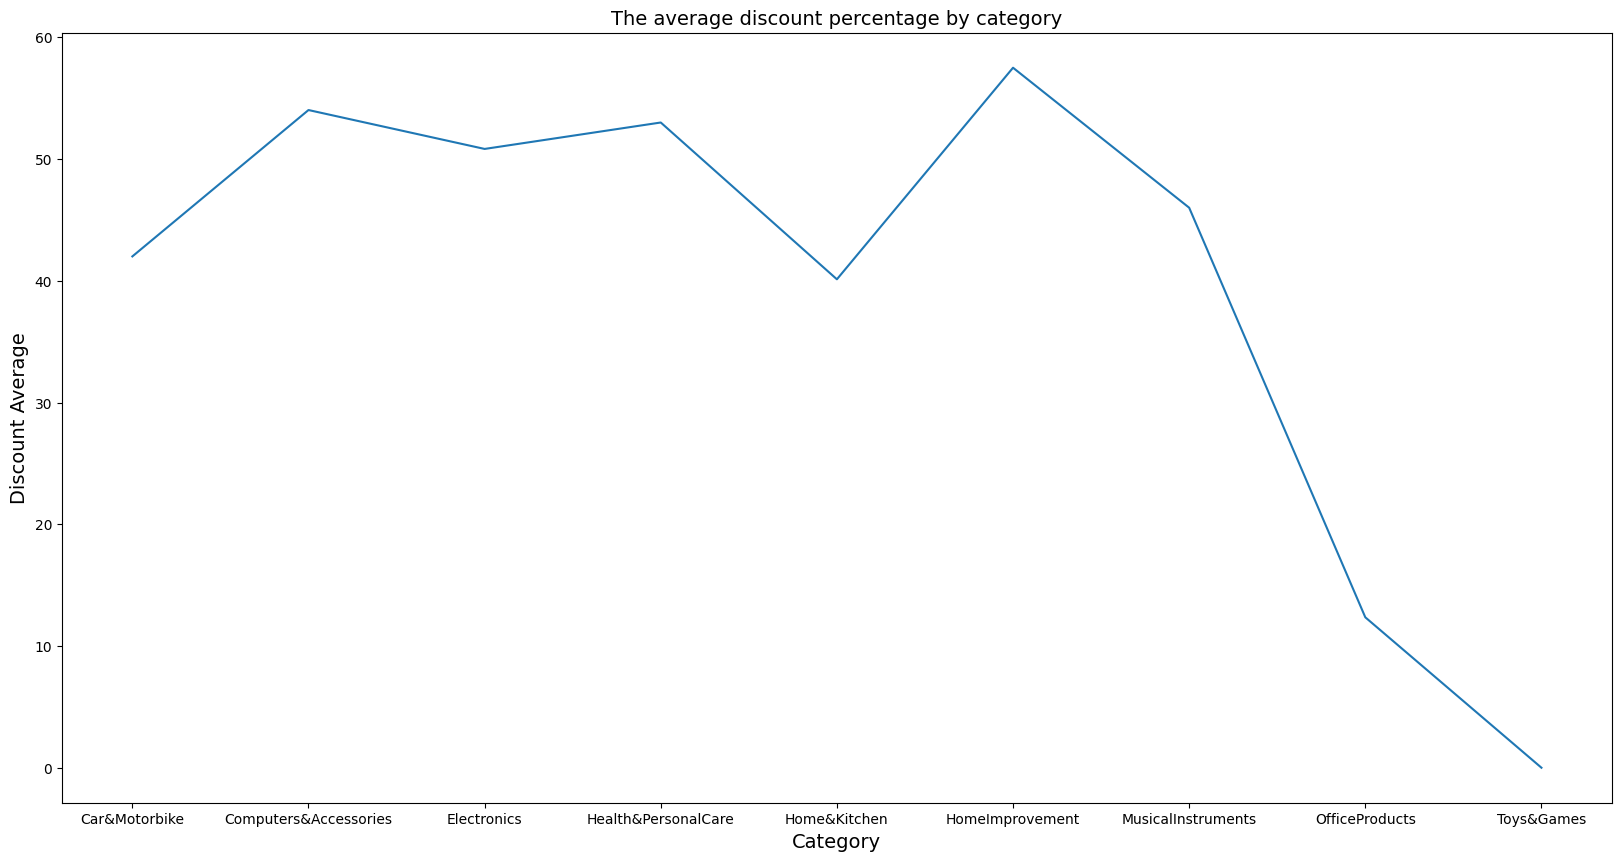

           main_category  discount_percentage
0          Car&Motorbike            42.000000
1  Computers&Accessories            54.024283
2            Electronics            50.828897
3    Health&PersonalCare            53.000000
4           Home&Kitchen            40.120536
5        HomeImprovement            57.500000
6     MusicalInstruments            46.000000
7         OfficeProducts            12.354839
8             Toys&Games             0.000000


In [23]:
#4. How does the average discount percentage vary across categories?

# convert percentage value into Integer
plt.figure(figsize=(20,10))

df['discount_percentage'] = df['discount_percentage'].astype(str)
df['discount_percentage'] = df['discount_percentage'].str.replace("%","").astype(int)

# Groupby the category and calculate the average discount percentage
# only extract the first name  categories
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])

average_discount_by_category = df.groupby("main_category")["discount_percentage"].mean().reset_index()

sns.lineplot(x = "main_category", y= "discount_percentage", data = average_discount_by_category)
plt.xlabel("Category", fontsize = 14)
plt.ylabel("Discount Average", fontsize = 14)
plt.title("The average discount percentage by category", fontsize = 14)
plt.show()


print(average_discount_by_category)

# Insight >> The maximmum average discount was given in Home improvement type product 

In [24]:
#5. What are the most popular product names ?

product_counts = df["product_name"].value_counts().reset_index()
product_counts.columns = ["product_name", 'count']
most_popular = product_counts.head(1)

print("The most popular product name is:",most_popular.iloc[0]["product_name"])

The most popular product name is: Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution


In [25]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category'],
      dtype='object')

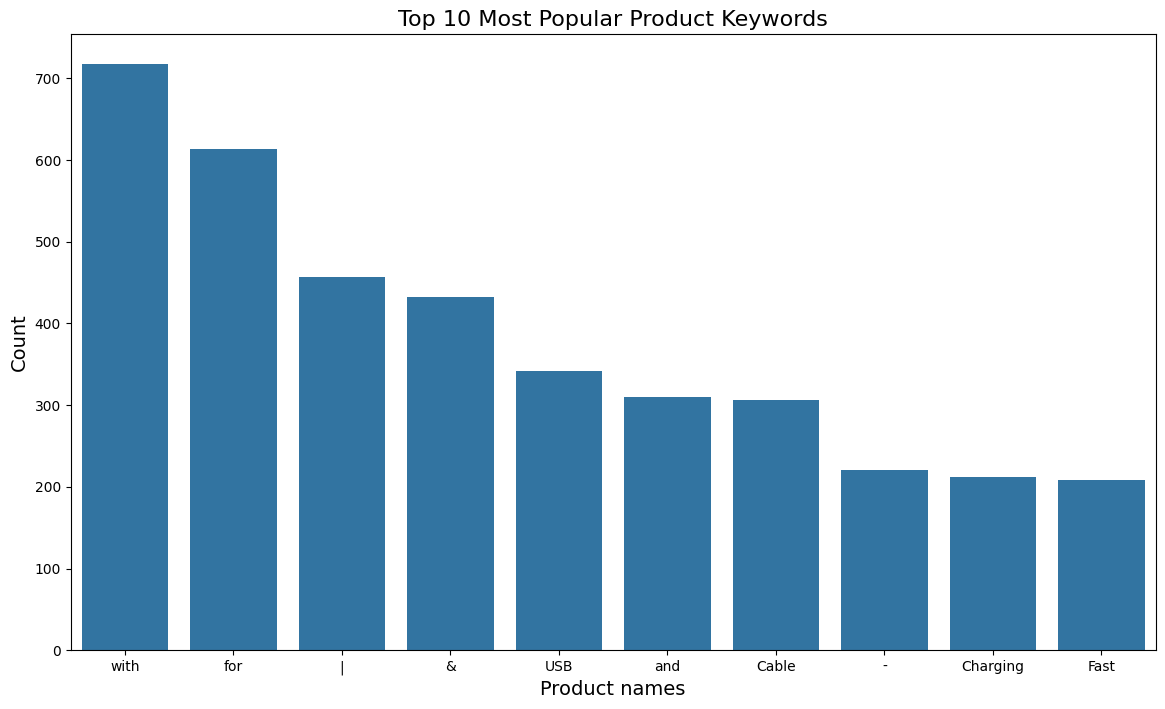

In [26]:
#6 What are the most popular product keywords ?

# combine all product names into a single string
all_product_names = ' '.join(df["product_name"].dropna().tolist())

# split the string into individual words
keywords = all_product_names.split()

# count the frequency of each keyword 
keyword_counts = Counter(keywords)

# Convert the counter to a DataFrame
keyword_df = pd.DataFrame(keyword_counts.items(), columns = ['keyword','count'])

# Sort the DataFraeme by count

keyword_df = keyword_df.sort_values(by = "count", ascending = False)

# plot the most popular keywords

plt.figure(figsize = (14,8))
sns.barplot(y = "count", x = "keyword", data = keyword_df.head(10))
plt.ylabel("Count", fontsize = 14)
plt.xlabel('Product names', fontsize = 14)
plt.title("Top 10 Most Popular Product Keywords", fontsize = 16)
plt.show()

In [27]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category'],
      dtype='object')

In [28]:
#7. What are the most popular product reviews ?


review_counts = df.groupby('product_name')['review_id'].count().reset_index()
review_counts.columns = ["product_name", "review_count"]

review_counts = review_counts.sort_values(by = "review_count", ascending = False)

print("Top 10 Most popular Product Reviews:")
print(review_counts.head(10))

Top 10 Most popular Product Reviews:
                                           product_name  review_count
384   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5
386   Fire-Boltt Phoenix Smart Watch with Bluetooth ...             4
1328  pTron Solero TB301 3A Type-C Data and Fast Cha...             3
125   Ambrane 60W / 3A Fast Charging Output Cable wi...             3
107   AmazonBasics New Release Nylon USB-A to Lightn...             3
134   Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             3
84    Amazon Basics USB Type-C to USB-A 2.0 Male Fas...             3
118   Amazonbasics Nylon Braided Usb-C To Lightning ...             3
390   Fire-Boltt Visionary 1.78" AMOLED Bluetooth Ca...             3
324   Duracell USB C To Lightning Apple Certified (M...             3


In [48]:
#8 What is the correlation between discounted_price and ratings ?

# Convert 'rating' column to string
df['rating'] = df['rating'].astype(str)

# Replace '|' character
df['rating'] = df['rating'].str.replace('|', '')

# Replace empty strings with NaN
df['rating'] = df['rating'].replace('', np.nan)

# Drop rows with NaN values in 'rating' column
df = df.dropna(subset=['rating'])

# Convert 'rating' column to float
df['rating'] = df['rating'].astype(float)

# Convert 'discounted_price' column to string
df['discounted_price'] = df['discounted_price'].astype(str)

# Replace '₹' and ',' characters
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')

# Replace any non-numeric values with NaN
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Drop rows with NaN values in 'discounted_price' column
df = df.dropna(subset=['discounted_price'])

# Convert 'discounted_price' column to float
df['discounted_price'] = df['discounted_price'].astype(float)

# Calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])
print("Correlation between discounted_price and ratings:", correlation)


Correlation between discounted_price and ratings: 0.12033741712288552


In [49]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category'],
      dtype='object')

In [74]:
#9. what are the top 5 categories based on the highest ratings ?

category_ratings = df.groupby("category")["rating"].count().reset_index()

# sort the categories by rating count

category_ratings = category_ratings.sort_values(by = 'rating', ascending = False)
top_5_categories = category_ratings.head(5) # 
#Display the top 5 categories
print("Top 5 Categories Based on Highest Ratings:") 
print(top_5_categories)


Top 5 Categories Based on Highest Ratings:
                                              category  rating
10   Computers&Accessories|Accessories&Peripherals|...     233
119        Electronics|WearableTechnology|SmartWatches      76
117  Electronics|Mobiles&Accessories|Smartphones&Ba...      68
97   Electronics|HomeTheater,TV&Video|Televisions|S...      63
76   Electronics|Headphones,Earbuds&Accessories|Hea...      52


In [75]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category'],
      dtype='object')

In [ ]:
#10' Identify any potential areas for improvement or optimization based on the data analysis

#Based on data there are many areas for improvemer=nt or optimized the data like check the discounted_price , and check the review section and take sufficient to complete the issues>
